# Tarea 4 - Taller de Python para Ciencias de Datos
Por: Cristofer Alarcón, Felipe Espinoza y Francisco Salazar

## 1. Importar las librerías y datos a analizar.


Se importan las librerías necesarias

In [67]:
import pandas as pd
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact

Se cargan los datos en un dataframe

In [68]:
df = pd.read_csv("datos_vehiculos_procesados.csv", skiprows=0, low_memory=False)
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,km/L,km,km/LNorm,kmNorm,gastos-en-km/L,Transmision Automatica,Transmision Manual,Transmision Semi-Automatica
0,Fiesta,2017,12000,Automatic,15944,Petrol,113.417932,57.7,1.0,24,25659.31696,0.285927,0.089753,Bajo,1,0,0
1,Focus,2018,14000,Manual,9083,Petrol,150.000000,57.7,1.0,24,14617.63522,0.285927,0.051130,Bajo,0,1,0
2,Focus,2017,13000,Manual,12456,Petrol,150.000000,57.7,1.0,24,20045.93904,0.285927,0.070118,Bajo,0,1,0
3,Fiesta,2019,17500,Manual,10460,Petrol,145.000000,40.3,1.5,17,16833.69640,0.199703,0.058882,Bajo,0,1,0
4,Fiesta,2019,16500,Automatic,1482,Petrol,145.000000,48.7,1.0,20,2385.04188,0.241328,0.008343,Bajo,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17961,B-MAX,2017,8999,Manual,16700,Petrol,150.000000,47.1,1.4,20,26875.97800,0.233399,0.094008,Bajo,0,1,0
17962,B-MAX,2014,7499,Manual,40700,Petrol,30.000000,57.7,1.0,24,65500.13800,0.285927,0.229110,Bajo,0,1,0
17963,Focus,2015,9999,Manual,7010,Diesel,20.000000,67.3,1.6,28,11281.47340,0.333499,0.039461,Bajo,0,1,0
17964,KA,2018,8299,Manual,5007,Petrol,145.000000,57.7,1.2,24,8057.96538,0.285927,0.028186,Bajo,0,1,0


Reviso si el dataframe tiene valores NaN

In [69]:
df.isnull().any()

model                          False
year                           False
price                          False
transmission                   False
mileage                        False
fuelType                       False
tax                            False
mpg                            False
engineSize                     False
km/L                           False
km                             False
km/LNorm                       False
kmNorm                         False
gastos-en-km/L                 False
Transmision Automatica         False
Transmision Manual             False
Transmision Semi-Automatica    False
dtype: bool

---

Ya que se va a analizar mpg, se eliminan ciertos datos que pueden generar error.

In [70]:
drop1 = df[(df.fuelType == 'Hybrid')].index
df.drop(drop1, inplace=True)

df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,km/L,km,km/LNorm,kmNorm,gastos-en-km/L,Transmision Automatica,Transmision Manual,Transmision Semi-Automatica
0,Fiesta,2017,12000,Automatic,15944,Petrol,113.417932,57.7,1.0,24,25659.31696,0.285927,0.089753,Bajo,1,0,0
1,Focus,2018,14000,Manual,9083,Petrol,150.000000,57.7,1.0,24,14617.63522,0.285927,0.051130,Bajo,0,1,0
2,Focus,2017,13000,Manual,12456,Petrol,150.000000,57.7,1.0,24,20045.93904,0.285927,0.070118,Bajo,0,1,0
3,Fiesta,2019,17500,Manual,10460,Petrol,145.000000,40.3,1.5,17,16833.69640,0.199703,0.058882,Bajo,0,1,0
4,Fiesta,2019,16500,Automatic,1482,Petrol,145.000000,48.7,1.0,20,2385.04188,0.241328,0.008343,Bajo,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17961,B-MAX,2017,8999,Manual,16700,Petrol,150.000000,47.1,1.4,20,26875.97800,0.233399,0.094008,Bajo,0,1,0
17962,B-MAX,2014,7499,Manual,40700,Petrol,30.000000,57.7,1.0,24,65500.13800,0.285927,0.229110,Bajo,0,1,0
17963,Focus,2015,9999,Manual,7010,Diesel,20.000000,67.3,1.6,28,11281.47340,0.333499,0.039461,Bajo,0,1,0
17964,KA,2018,8299,Manual,5007,Petrol,145.000000,57.7,1.2,24,8057.96538,0.285927,0.028186,Bajo,0,1,0


También se elimina el único dato que hay en el año 2060 ya que genera problemas al graficar, siendo un año muy alejado al resto.

In [71]:
drop2 = df[(df.year == 2060)].index
df.drop(drop2, inplace=True)

df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,km/L,km,km/LNorm,kmNorm,gastos-en-km/L,Transmision Automatica,Transmision Manual,Transmision Semi-Automatica
0,Fiesta,2017,12000,Automatic,15944,Petrol,113.417932,57.7,1.0,24,25659.31696,0.285927,0.089753,Bajo,1,0,0
1,Focus,2018,14000,Manual,9083,Petrol,150.000000,57.7,1.0,24,14617.63522,0.285927,0.051130,Bajo,0,1,0
2,Focus,2017,13000,Manual,12456,Petrol,150.000000,57.7,1.0,24,20045.93904,0.285927,0.070118,Bajo,0,1,0
3,Fiesta,2019,17500,Manual,10460,Petrol,145.000000,40.3,1.5,17,16833.69640,0.199703,0.058882,Bajo,0,1,0
4,Fiesta,2019,16500,Automatic,1482,Petrol,145.000000,48.7,1.0,20,2385.04188,0.241328,0.008343,Bajo,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17961,B-MAX,2017,8999,Manual,16700,Petrol,150.000000,47.1,1.4,20,26875.97800,0.233399,0.094008,Bajo,0,1,0
17962,B-MAX,2014,7499,Manual,40700,Petrol,30.000000,57.7,1.0,24,65500.13800,0.285927,0.229110,Bajo,0,1,0
17963,Focus,2015,9999,Manual,7010,Diesel,20.000000,67.3,1.6,28,11281.47340,0.333499,0.039461,Bajo,0,1,0
17964,KA,2018,8299,Manual,5007,Petrol,145.000000,57.7,1.2,24,8057.96538,0.285927,0.028186,Bajo,0,1,0


## 2. Analisis de las variables a seleccionar para modelar el problema.

Se revisan todas las correlaciones del dataframe.

In [72]:
df.corr()

,year,price,mileage,tax,mpg,engineSize,km/L,km,km/LNorm,kmNorm,Transmision Automatica,Transmision Manual,Transmision Semi-Automatica
year,1.000000,0.645315,-0.718873,0.298976,-0.027677,-0.141102,-0.026228,-0.718873,-0.027677,-0.718873,0.030943,-0.033566,0.014015
price,0.645315,1.000000,-0.530931,0.407085,-0.374265,0.409311,-0.373362,-0.530931,-0.374265,-0.530931,0.203997,-0.254988,0.140745
mileage,-0.718873,-0.530931,1.000000,-0.258670,0.127323,0.216036,0.129352,1.000000,0.127323,1.000000,-0.051624,0.060367,-0.029648
tax,0.298976,0.407085,-0.258670,1.000000,-0.517918,0.185207,-0.512617,-0.258670,-0.517918,-0.258670,0.156801,-0.182819,0.089282
mpg,-0.027677,-0.374265,0.127323,-0.517918,1.000000,-0.279614,0.997518,0.127323,1.000000,0.127323,-0.250929,0.322176,-0.185355
engineSize,-0.141102,0.409311,0.216036,0.185207,-0.279614,1.000000,-0.273157,0.216036,-0.279614,0.216036,0.159117,-0.220377,0.140606
km/L,-0.026228,-0.373362,0.129352,-0.512617,0.997518,-0.273157,1.000000,0.129352,0.997518,0.129352,-0.250888,0.322372,-0.185682
km,-0.718873,-0.530931,1.000000,-0.258670,0.127323,0.216036,0.129352,1.000000,0.127323,1.000000,-0.051624,0.060367,-0.029648
km/LNorm,-0.027677,-0.374265,0.127323,-0.517918,1.000000,-0.279614,0.997518,0.127323,1.000000,0.127323,-0.250929,0.322176,-0.185355
kmNorm,-0.718873,-0.530931,1.000000,-0.258670,0.127323,0.216036,0.129352,1.000000,0.127323,1.000000,-0.051624,0.060367,-0.029648


Se muestra la correlación de las columnas de `precio` y `año`. 

In [73]:
df[['price', 'year']].corr()

,price,year
price,1.000000,0.645315
year,0.645315,1.000000


Se examinó la correlación entre las variables `año` y `price` (0.645) ya que, de todas las variables, el año (`mpg`) es la variable más correlacionada con el precio (`price`).

(0.0, 58736.8832968566)

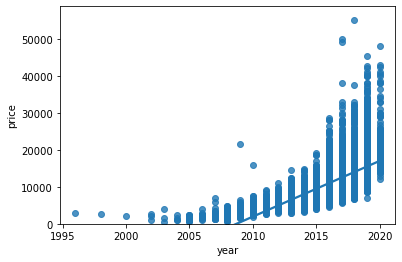

In [74]:
sns.regplot(x="year", y="price", data=df)

plt.ylim(0,)   

A medida que aumenta el año, aumenta el precio: esto indica una **correlación directa/positiva** entre estas dos variables. El año parece un indicador bastante bueno del precio, ya que la línea de regresión es casi una línea diagonal perfecta.

### Coeficiente de correlación de Pearson

Se va a calcular el coeficiente de correlación de Pearson para analizar la relación lineal entre las variables

La información del **valor P** se puede obtener usando el módulo `stats` de la biblioteca `scipy`.

In [75]:
from scipy import stats

#### Año versus Precio

In [76]:
coeficiente_pearson, valor_p = stats.pearsonr(df['year'], df['price'])
print("El coeficiente de la Correlación de Pearson es", coeficiente_pearson, " con un valor P =", valor_p)

El coeficiente de la Correlación de Pearson es 0.6453154101846579  con un valor P = 0.0


**$\therefore $ Conclusión:**

Dado que el valor P es $<$ 0.001, la correlación entre el *año* y el *precio* es estadísticamente significativa, aunque la relación lineal no es especialmente fuerte (~0.645).

---

## 3. Modelos de regresión

### Modelo de Regresión Lineal Simple

Primero, se debe cargar el módulo para la regresión lineal.

In [77]:
from sklearn.linear_model import LinearRegression

Una vez cargado se procede a crear un objeto del tipo regresión lineal,  `LinearRegression()`.

In [78]:
lm = LinearRegression()
lm

LinearRegression()

#### ¿Cómo podría el consumo en millas por galón ayudar a predecir el precio de un automóvil?

Utilizando una regresión lineal simple, se creará una función lineal con `mpg` como la variable predictora y `price` como la variable de respuesta.

In [79]:
X = df[['year']]
Y = df['price']

Para ajustar el modelo lineal se utilizarán los datos de la variable `mpg`.

In [80]:
lm.fit(X,Y)

LinearRegression()

Ahora, se podría generar una predicción.

In [81]:
Y_hat=lm.predict(X)
Y_hat[0:5]

array([12475.01994225, 13980.66157135, 12475.01994225, 15486.30320045,
       15486.30320045])

Intersección $a$:

In [82]:
lm.intercept_

-3024404.1459500315

Pendiente $b$:

In [83]:
lm.coef_

array([1505.6416291])

**$\therefore $ Conclusión:**

Reemplazando los valores obtenidos en el modelo lineal con la estructura: $ \hat{Y} = a + b  X $, se obtiene la siguiente fórmula: $\hat{price} = -3024404.14 + 1505.64 \times year$.

#### Gráfico de Regresión Simple

(0.0, 58736.779944875365)

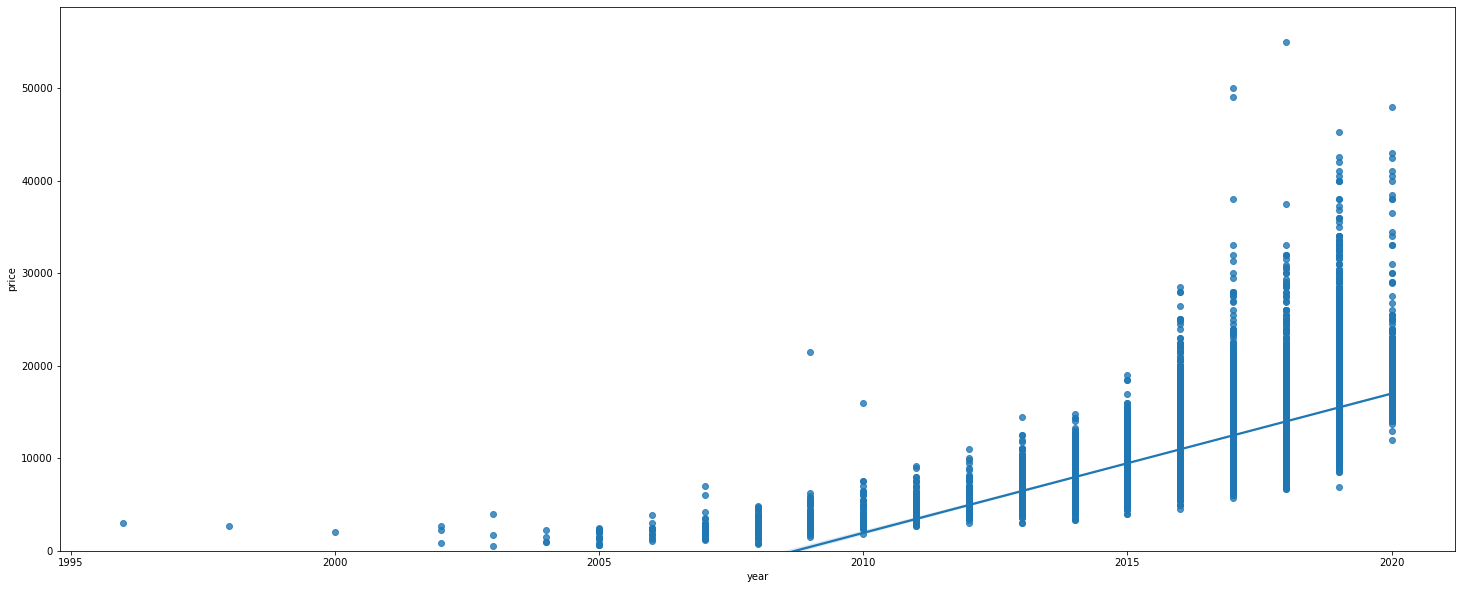

In [84]:
ancho = 25
alto = 10
plt.figure(figsize=(ancho, alto))
sns.regplot(x="year", y="price", data=df)
plt.ylim(0,)

De este gráfico se puede observar que el precio está positivamente correlacionado con el año del vehiculo, ya que la pendiente de la regresión es positiva.

Como los datos están cercanos a la línea, este modelo lineal podría ser el mejor modelo para estos datos. Por lo tanto, se graficó utilizando un gráfico de residuos:

#### Gráfico de Residuos

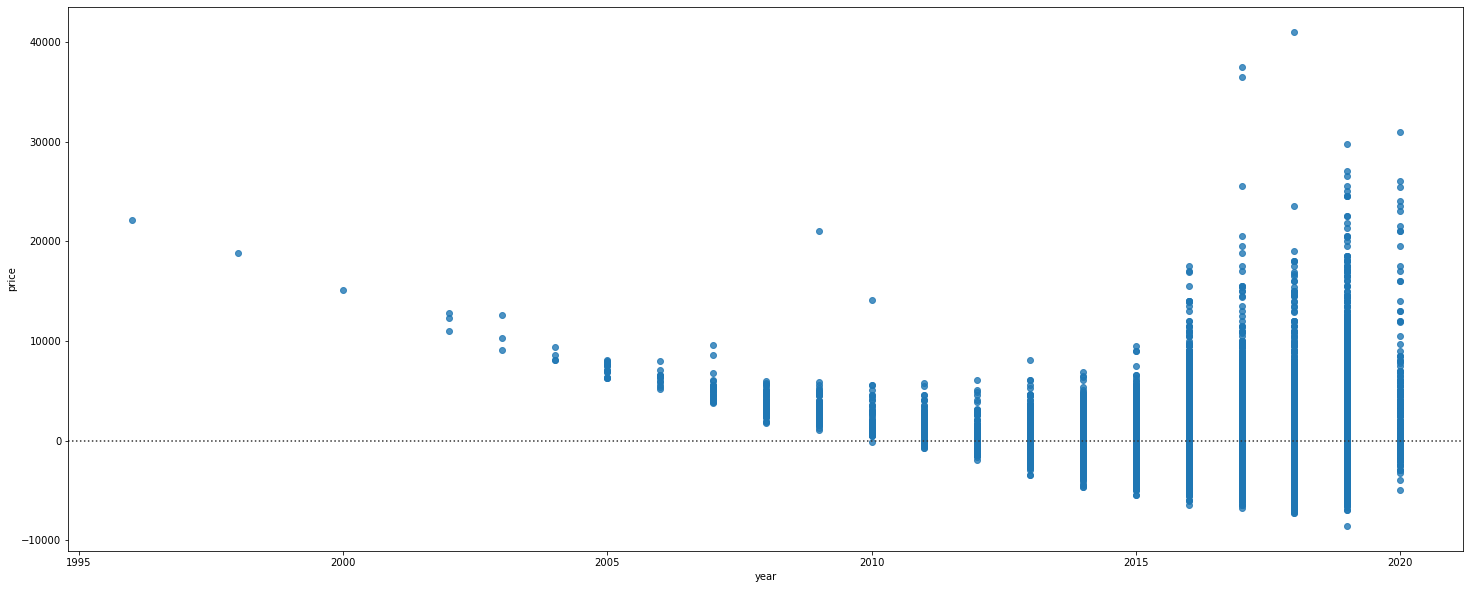

In [85]:
ancho = 25
alto = 10
plt.figure(figsize=(ancho, alto))
sns.residplot(x=df['year'], y=df['price'])
plt.show()

Se puede ver en este gráfico de residuos que los residuos se distribuyen aleatoriamente alrededor del eje x, lo que nos lleva a creer que un modelo lineal sea lo más apropiado para estos datos.

#### Error de la Regresión Lineal Simple

Se debe importar la función **mean_squared_error** del módulo **metrics**:

In [86]:
from sklearn.metrics import mean_squared_error

Se ajusta el modelo

In [87]:
lm.fit(X, Y)

LinearRegression()

Se encuentra el $R^2$

In [88]:
print('El valor de R-cuadrado es: ', lm.score(X, Y))

El valor de R-cuadrado es:  0.4164319786217975


El valor entregado nos indica que el \~41.64% de la variación del precio se explica por el modelo lineal simple basado en `year`.

Ahora, se calculará el MSE.

Primero se debe predecir la salida, es decir, $\hat{y}$ usando el método de predicción, donde $X$ es la variable de entrada.

In [89]:
Y_hat=lm.predict(X)
print('La salida de los primeros cuatro valores de predicción es: ', Y_hat[0:4])

La salida de los primeros cuatro valores de predicción es:  [12475.01994225 13980.66157135 12475.01994225 15486.30320045]


 Ahora, se puede comparar los resultados previstos con los resultados reales. Recordar que un valor bajo de MSE indica que hay un mejor ajuste.

In [90]:
mse = mean_squared_error(df['price'], Y_hat)
print(mse)

13022368.41546174


Por lo tanto, el error cuadrático medio del precio y el precio pronosticado es ~13022368.

**$\therefore $ Conclusión:**

Finalmente, luego de todos los análisis, se probó que un modelo lineal simple no es el mejor tipo de modelo para este conjunto de datos, por lo que luego, se modeló utilizando un modelo de regresión lineal multiple y un gráfico de regresión múltiple

### Modelo de Regresión Lineal Multiple

Se van a analizar las variables `tax`, `engineSize`, `Transmision Automatica` y `Transmision Semi-Automatica`.

In [91]:
Z = df[['tax', 'engineSize', 'Transmision Automatica', 'Transmision Semi-Automatica']]

Se ajusta el modelo lineal utilizando las cuatro variables anteriores.

In [92]:
df.isnull().any()

model                          False
year                           False
price                          False
transmission                   False
mileage                        False
fuelType                       False
tax                            False
mpg                            False
engineSize                     False
km/L                           False
km                             False
km/LNorm                       False
kmNorm                         False
gastos-en-km/L                 False
Transmision Automatica         False
Transmision Manual             False
Transmision Semi-Automatica    False
dtype: bool

In [93]:
lm.fit(Z, df['price'])

LinearRegression()

Intersección $a$:

In [94]:
lm.intercept_

4474.718921241858

Valores de los coeficientes ($b_1$, $b_2$, $b_3$, $b_4$):

In [95]:
lm.coef_

array([  24.73899341, 3521.34778368, 1928.39794545, 1472.79479142])

##### Gráfico de Regresión Lineal Múltiple

In [96]:
Y_hat_multi = lm.predict(Z)

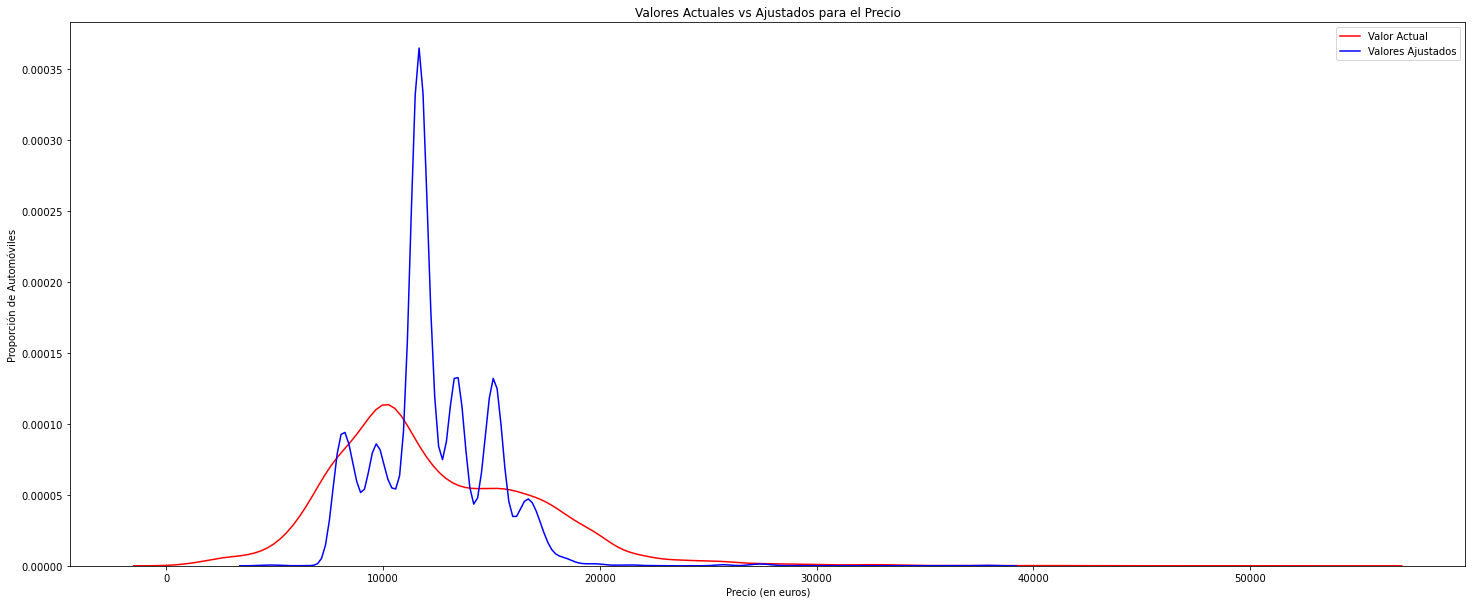

In [97]:
plt.figure(figsize=(ancho, alto))

ax1 = sns.kdeplot(df['price'], color="r", label="Valor Actual")
sns.kdeplot(Y_hat_multi, color="b", label="Valores Ajustados" , ax=ax1)

plt.title('Valores Actuales vs Ajustados para el Precio')
plt.xlabel('Precio (en euros)')
plt.ylabel('Proporción de Automóviles')

plt.legend(loc='upper right')

plt.show()
plt.close()

Del gráfico se puede observar que los valores ajustados para las cuatro variables están algo alejadas de los valores reales.

#### Error de la Regresión Lineal Multiple

Se calculó el $R^2$ de la relación entre el impuesto (`tax`), el tamaño del motor (`engineSize`), Transmision Automatica (`Transmision Automatica`) y `Transmision Semi-Automatica` con el precio (`price`) que ya se encuentra almacenado en la variable Z utilizando el modelo de regresión lineal multiple definido en el objeto lm.

Primero, se ajusta el modelo.

In [98]:
lm.fit(Z, df['price'])

LinearRegression()

Luego, se encuentra $R^2$.

In [99]:
print('El valor de R-cuadrado es: ', lm.score(Z, df['price']))

El valor de R-cuadrado es:  0.295966766227689


 El valor entregado nos indica que el ~29.59% de la variación del precio se explica por el modelo lineal multiple basado en las variables ``tax``, ``engineSize``, ``Transmision Automatica`` y ``Transmision Semi-Automatica``.

Ahora, se calculará el MSE.

Primero se debe predecir la salida, es decir, $\hat{y}$ usando el método de predicción, donde $Z$ es la variable de entrada.

In [100]:
Y_hat_multi = lm.predict(Z)

Luego, se puede proceder a comparar los resultados previstos con los resultados reales.

In [101]:
print(mean_squared_error(df['price'], Y_hat_multi))

15710559.542415641


Por lo tanto, el error cuadrático medio del precio y el precio pronosticado usando un multi ajuste es: ~15710559.

**$\therefore $ Conclusión:**

Finalmente, luego de todos los análisis, se probó que un modelo de regresión lineal múltiple tampoco es el mejor tipo de modelo para este conjunto de datos, por lo que, considerando también los resultados del modelo de regresión lineal simple, se puede concluir que un modelo no lineal puede resultar ser mejor para este set de datos.

---

### Modelo de Regresión Polinomial Simple

Como se mencionó anteriormente, un modelo lineal no proporcionaba el mejor ajuste al utilizar el atributo de millas por galón (`mpg`) como variable de predicción. Por lo tanto, se ajustarán los datos a un modelo polinomial.

#### Gráfico de Regresión Polinomial Simple

Se utilizará la siguiente función para graficar los datos:

In [102]:
def GraficaPolinomial(modelo, variable_independiente, variable_dependiente, Nombre):
    nuevo_x = np.linspace(15, 55, 100)
    nuevo_y = modelo(nuevo_x)

    plt.plot(variable_independiente, variable_dependiente, '.', nuevo_x, nuevo_y, '-')
    plt.title('Ajuste Polinomial con Matplotlib para Precio ~ ' + Nombre)
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    figura = plt.gcf()
    plt.xlabel(Nombre)
    plt.ylabel('Precio de los Automóviles')
    figura.set_size_inches(18, 10)
    plt.show()
    plt.close()

Ahora hay que preparar las variables/parámetros de entrada.

In [103]:
x = df['year']
y = df['price']
#X = df[['year']]
#Y = df['price']

El siguiente paso es ajustar el polinomio usando la función .polyfit(), luego se usará la función .poly1d() para mostrar la función polinomial.

In [104]:
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

       3             2
6.294 x - 3.791e+04 x + 7.611e+07 x - 5.093e+10


Para visualizar los datos aplicados a la función polinomial generada se llamará a la función definida previamente, GraficaPolinomial.

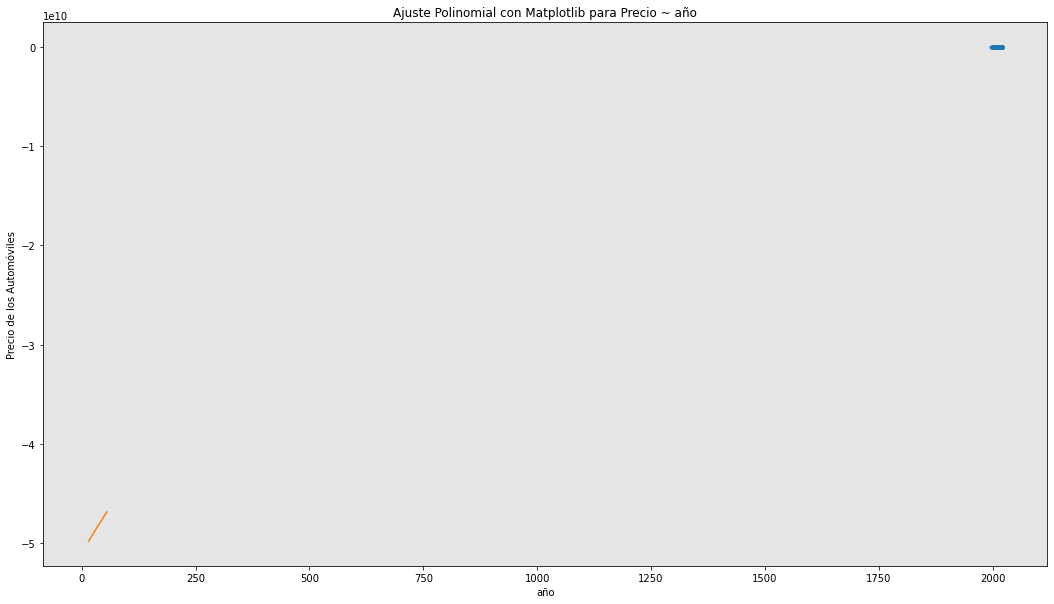

In [105]:
GraficaPolinomial(p, x, y, 'año')

In [106]:
np.polyfit(x, y, 3)

array([ 6.29413364e+00, -3.79092673e+04,  7.61088846e+07, -5.09337705e+10])

**$\therefore $ Conclusión:**

Se puede observar en el gráfico que este modelo polinomial no muestra nada que nos pueda ser util, en cambio el modelo lineal si acierta a una gran cantidad de puntos. 

Ahora usaremos este mismo modelo polinomial, pero con las variables mpg-price para ver las diferencias



Ahora hay que preparar las variables/parámetros de entrada.

In [107]:
t = df['mpg']
m = df['price']

El siguiente paso es ajustar el polinomio usando la función .polyfit(), luego se usará la función .poly1d() para mostrar la función polinomial.

In [108]:
f = np.polyfit(t, m, 3)
p = np.poly1d(f)
print(p)

         3         2
-0.2148 x + 43.01 x - 2917 x + 7.806e+04


Para visualizar los datos aplicados a la función polinomial generada se llamará a la función definida previamente, GraficaPolinomial.

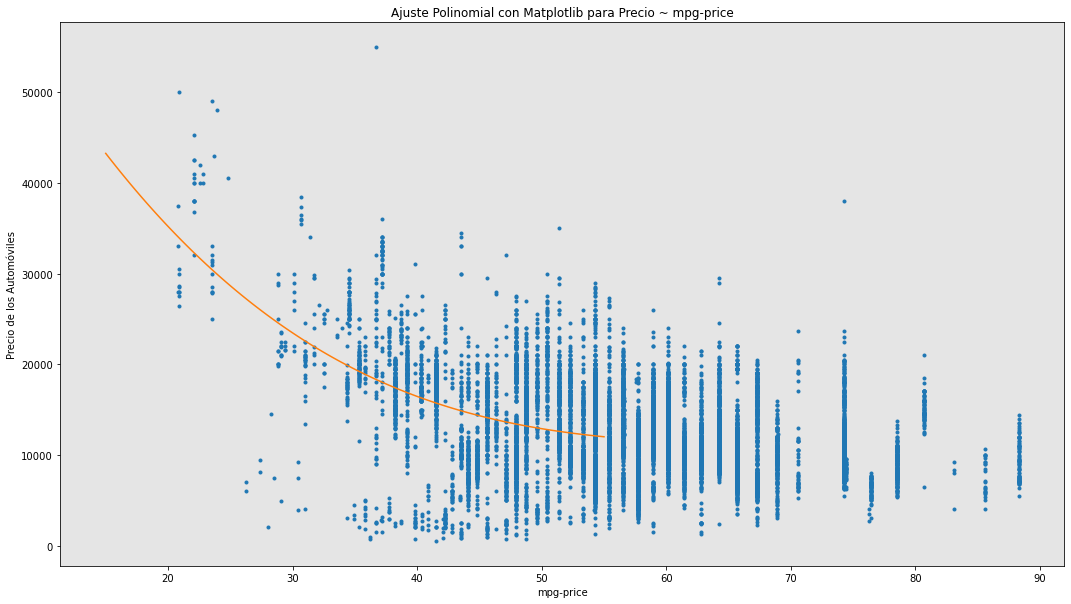

In [109]:
GraficaPolinomial(p, t, m, 'mpg-price')

**$\therefore $ Conclusión:**

Se puede observar en el gráfico que este modelo polinomial, con las variables mpg-price funciona de buena forma. Esto se debe a que la función polinomial generada acierta más puntos de datos.

#### Error de la Regresión Polinomial

:Se calculó el  $R^2$  de la relación entre año (`year`) que ya se encuentra almacenado en la variable X y el precio `price` que ya se encuentra almacenado en la variable Y, utilizando la función de regresión polinomial definido en el objeto P.

Primero, se importa la función **r2_score** del módulo **metrics**, ya que se va a usar una función diferente.

In [110]:
from sklearn.metrics import r2_score

Ahora, se puede aplicar la función para obtener el valor de $R^2$:

In [111]:
r_cuadrado = r2_score(y, p(x))
print(r_cuadrado)

-113710036493.25922


El valor cuadratico entregado esta super alejado de la curva polinomial, como se puede observar en la grafica anterior de year-price

Luego, se debe calcular el MSE.

Para esto, los valores de $\hat{y}$  van a estar dados por la función P(x) donde  x  es la variable de entrada.

In [112]:
mean_squared_error(df['price'], p(x))

2.537448820904759e+18

Por lo tanto, el error cuadrático medio del precio y el precio pronosticado es 2.5374488209047363e+18.

## 4. Evaluación del modelo

Un aspecto importante para probar un modelo es dividir los datos en **datos de entrenamiento** y **datos de prueba**. Se pondrán los datos de la variable de destino precio `price` en un dataframe separado con el nombre de `y_datos`.

In [113]:
y_datos = df[['price']]
y_datos

,price
0,12000
1,14000
2,13000
3,17500
4,16500
...,...
17961,8999
17962,7499
17963,9999
17964,8299


Después, se procede a quitar la columna del precio del dataframe original y este se almacena en un nuevo dataframe con el nombre de `x_datos`:

In [114]:
x_datos=df.drop('price',axis=1)
x_datos

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,km/L,km,km/LNorm,kmNorm,gastos-en-km/L,Transmision Automatica,Transmision Manual,Transmision Semi-Automatica
0,Fiesta,2017,Automatic,15944,Petrol,113.417932,57.7,1.0,24,25659.31696,0.285927,0.089753,Bajo,1,0,0
1,Focus,2018,Manual,9083,Petrol,150.000000,57.7,1.0,24,14617.63522,0.285927,0.051130,Bajo,0,1,0
2,Focus,2017,Manual,12456,Petrol,150.000000,57.7,1.0,24,20045.93904,0.285927,0.070118,Bajo,0,1,0
3,Fiesta,2019,Manual,10460,Petrol,145.000000,40.3,1.5,17,16833.69640,0.199703,0.058882,Bajo,0,1,0
4,Fiesta,2019,Automatic,1482,Petrol,145.000000,48.7,1.0,20,2385.04188,0.241328,0.008343,Bajo,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17961,B-MAX,2017,Manual,16700,Petrol,150.000000,47.1,1.4,20,26875.97800,0.233399,0.094008,Bajo,0,1,0
17962,B-MAX,2014,Manual,40700,Petrol,30.000000,57.7,1.0,24,65500.13800,0.285927,0.229110,Bajo,0,1,0
17963,Focus,2015,Manual,7010,Diesel,20.000000,67.3,1.6,28,11281.47340,0.333499,0.039461,Bajo,0,1,0
17964,KA,2018,Manual,5007,Petrol,145.000000,57.7,1.2,24,8057.96538,0.285927,0.028186,Bajo,0,1,0


Ahora, se procede a dividir aleatoriamente los datos en **datos de entrenamiento** y **datos de prueba** usando la función `train_test_split`.

In [115]:
from sklearn.model_selection import train_test_split

x_entrena, x_prueba, y_entrena, y_prueba = train_test_split(x_datos, y_datos, test_size=0.10, random_state=1)

print("número de muestras de prueba:", x_prueba.shape[0])
print("número de muestras de entrenamiento:",x_entrena.shape[0])

número de muestras de prueba: 1795
número de muestras de entrenamiento: 16148


El parámetro de tamaño de prueba `test_size` establece la proporción de datos que se dividen en el conjunto de prueba. En el ejemplo anterior, el conjunto de prueba es ... del conjunto total de datos.

Una vez realizado la importación del método de regresión lineal se procede a crear objeto del tipo `LinearRegression`.

In [116]:
lre=LinearRegression()
lre

LinearRegression()

Luego, se ajusta/entrena el modelo usando el atributo/variables año (`year`):

In [117]:
lre.fit(x_entrena[['year']],y_entrena)

LinearRegression()

In [118]:
lre.score(x_prueba[['year']],y_prueba)

0.4268043093911914

In [119]:
lre.score(x_entrena[['year']],y_entrena)

0.41526800566341204

Nota: El valor post-entrenamiento es menor a 0.5, por lo que el modelo de regresion lineal si podria ser mas representativo para los valores.

## 5. Sobreajuste

Se realiza un sobreajuste al modelo elegido, el subajuste no es recomendable realizarlo por que tenemos una gran cantidad de valores, por lo que trabajaremos con la mitad de los datos y por tanto se ajustara al ruido que posee.

Es necesario importar el preprocesamiento PolynomialFeatures

In [120]:
from sklearn.preprocessing import PolynomialFeatures

Se usará el 60% de los datos para entrenamiento y el 40% de los datos para pruebas.

In [121]:
x_entrena2, x_prueba2, y_entrena2, y_prueba2 = train_test_split(x_datos, y_datos, test_size=0.4, random_state=0)

Se va a realizar una transformacion polinomial de grado 5

In [122]:
poli = PolynomialFeatures(degree=5)
x_entrena2_poli = poli.fit_transform(x_entrena2[['year']])
x_prueba2_poli = poli.transform(x_prueba2[['year']])
poli

PolynomialFeatures(degree=5)

Ahora, se creará un modelo de regresión lineal llamado `reg_pol` y se va a entrenar.

In [123]:
reg_pol = LinearRegression()
reg_pol.fit(x_entrena2_poli, y_entrena2)

LinearRegression()

Se puede ver un resultado del modelo usando el método `predict`. Para ello, se va a asignar los valores a la variable `y_hat_poli`.

In [124]:
y_hat_poli = reg_pol.predict(x_prueba2_poli)
y_hat_poli[0:5]

array([[16617.57416058],
       [ 8672.69860363],
       [14057.47348309],
       [16617.57416058],
       [10128.37309551]])

Mostrar los primeros cinco valores pronosticados y compararlos con los valores reales.

In [125]:
print("Valores pronosticados:", y_hat_poli[0:5])
print("Valores reales:", y_prueba2[0:5].values)

Valores pronosticados: [[16617.57416058]
 [ 8672.69860363]
 [14057.47348309]
 [16617.57416058]
 [10128.37309551]]
Valores reales: [[23760]
 [ 6989]
 [16500]
 [18998]
 [ 7498]]


Se usará la función `GraficoPoli` para mostrar los datos de entrenamiento, los datos de prueba y la función pronosticada.

In [126]:
def GraficoPoli(x_entrena, x_prueba, y_entrena, y_prueba, rl,transform_poli):
    ancho = 12
    alto = 10
    plt.figure(figsize=(ancho, alto))
    
    
    # datos de entrenamiento 
    # datos de pruebas
    # rl: objeto de regresión lineal 
    # transform_poli: objeto de transformación polinomial
 
    x_maximo=max([x_entrena.values.max(), x_prueba.values.max()])

    x_minimo=min([x_entrena.values.min(), x_prueba.values.min()])

    x=np.arange(x_minimo, x_maximo, 0.1)


    plt.plot(x_entrena, y_entrena, 'ro', label='Datos de Entrenamiento')
    plt.plot(x_prueba, y_prueba, 'go', label='Datos de Prueba')
    plt.plot(x, rl.predict(transform_poli.fit_transform(x.reshape(-1, 1))), label='Función Pronosticada')
    plt.ylim([-10000, 60000])
    plt.ylabel('Precio')
    plt.legend()

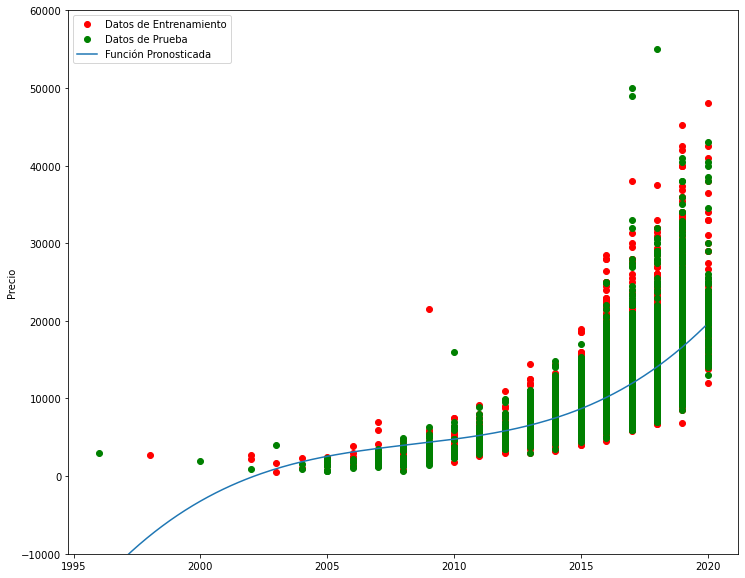

In [127]:
GraficoPoli(x_entrena2[['year']], x_prueba2[['year']], y_entrena2, y_prueba2, reg_pol,poli)

Figura 3: Un modelo de regresión polinomial donde los puntos rojos representan datos de entrenamiento, los puntos verdes representan datos de prueba y la línea azul representa la predicción del modelo.

El siguiente paso es evaluar el modelo con algunas métricas. Por ejemplo, calcular el valor de $R^2$ para los datos de entrenamiento.

In [128]:
reg_pol.score(x_entrena2_poli, y_entrena2)

0.46244605954320805

Calcular el valor de $R^2$ para los datos de prueba.

In [129]:
reg_pol.score(x_prueba2_poli, y_prueba2)

0.4600866152422656

Se puede observar que el valor de $R^2$ para los datos de entrenamiento es $0.4624$ mientras que el valor de $R^2$ en los datos de prueba fue $0.46$. 

El siguiente gráfico permite observar cómo cambia el valor de $R^2$ en los datos de prueba para polinomios de diferente orden.

Text(3.5, 0.456, 'R² Máximo ')

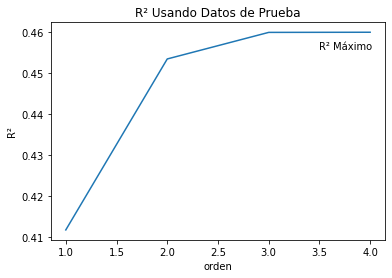

In [130]:
Rcuad_prueba = []

orden = [1, 2, 3, 4]
for n in orden:
    poliN = PolynomialFeatures(degree=n)
    
    x_entrena_poliN = poliN.fit_transform(x_entrena2[['year']])
    
    x_prueba_poliN = poliN.transform(x_prueba2[['year']])    
    
    reg_pol.fit(x_entrena_poliN, y_entrena2)
    
    Rcuad_prueba.append(reg_pol.score(x_prueba_poliN, y_prueba2))

plt.plot(orden, Rcuad_prueba)
plt.xlabel('orden')
plt.ylabel('R²')
plt.title('R² Usando Datos de Prueba')
plt.text(3.5, 0.456, 'R² Máximo ')    

Se puede observar que el valor de $R^2$ aumenta se forma lineal hasta los polinomios de orden 2 y vuelve a aumentar linealmente hasta los de orden 3 para mantenerse gradualmente hasta los polinomios de orden 4

In [131]:
def f(orden, datos_prueba):
    x_entrena, x_prueba, y_entrena, y_prueba = train_test_split(x_datos, y_datos, test_size=datos_prueba, random_state=0)
    poli = PolynomialFeatures(degree=orden)
    x_entrena_poli = poli.fit_transform(x_entrena[['year']])
    x_prueba_poli = poli.transform(x_prueba[['year']])
    reg_pol = LinearRegression()
    reg_pol.fit(x_entrena_poli,y_entrena)
    GraficoPoli(x_entrena[['year']], x_prueba[['year']], y_entrena,y_prueba, reg_pol, poli)

Esto ultimo es para probar como quedaria con distintos orden de polinomios y diferentes catidades de datos.

In [132]:
interact(f, orden=(0, 6, 1), datos_prueba=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='orden', max=6), FloatSlider(value=0.45, description='dat…

<function __main__.f(orden, datos_prueba)>